In [1]:
import matplotlib.pyplot as plt

from google.cloud import automl_v1beta1 as automl

Below, fill in the `project_id` and `model_display_name` variables with your project ID and the name of the AutoML model you trained.

In [2]:
project_id = "your-gcp-project"
compute_region = "us-central1"
model_display_name = "your-automl-tables-model" 

client = automl.TablesClient(project=project_id, region=compute_region)

In [3]:
# Example test input
inputs = {
    "Amount": 0,
    "V1": -0.46,
    "V2": 3.99,
    "V3": -.52,
    "V4": -1.42,
    "V5": -1.6,
    "V6": -.035,
    "V7": -0.011,
    "V8": -4.53,
    "V9": -0.595,
    "V10": -2.77,
    "V11": 1.39,
    "V12": .389,
    "V13": -1.14,
    "V14": 0.517,
    "V15": -2.89,
    "V16": -.177,
    "V17": -2.77,
    "V18": .26,
    "V19": -1.2,
    "V20": .41,
    "V21": -2.83,
    "V22": 1.95,
    "V23": 3.2,
    "V24": -2.3,
    "Time": 406,
    "V25": -.14,
    "V26": .32,
    "V27": .0465,
    "V28": 0.12
}

Predicted class:  fraud 97.0 % confidence


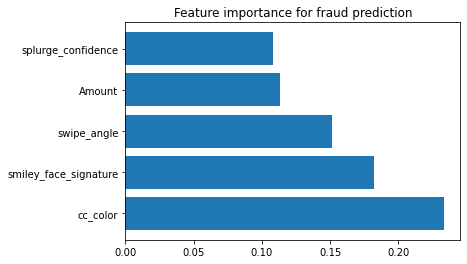

In [4]:
# Get an API response
response = client.predict(
    model_display_name=model_display_name,
    inputs=inputs,
    feature_importance=True,
)

class_lookup = {
    "0": "not fraud",
    "1": "fraud"
}

# Print results + feature attributions for each class
predicted_class = response.payload[1].tables.value.string_value
print("Predicted class: ",
      class_lookup[predicted_class], 
      round(response.payload[1].tables.score, 2) * 100, 
      "% confidence")

feat_list = [
    (column.feature_importance, column.column_display_name)
    for column in response.payload[1].tables.tables_model_column_info
]
feature_importance = {}

for i in feat_list:
    feature_importance[i[1]] = i[0]

sorted_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)[:5]}

fig, ax = plt.subplots()
ax.barh(list(sorted_importance.keys()), sorted_importance.values())
chart_title = "Feature importance for " + class_lookup[predicted_class] + " prediction"
ax.set_title(chart_title)
plt.show()